In [1]:
import nltk

# nltk.download()

In [2]:
# Import libraries

import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.metrics  import classification_report
from sklearn import metrics
import time



In [3]:
import os
import pandas as pd
cwd = os.path.abspath('CSV Data for Classifier') 
files = os.listdir(cwd) 

In [4]:
cwd

'C:\\Users\\Darren\\Documents\\GitHub\\FSX\\News Classifier\\CSV Data for Classifier'

In [5]:
files

['avalanche_straitstimes.csv',
 'contamination_straitstimes.csv',
 'cyberattack_straitstimes.csv',
 'cyclone_straitstimes.csv',
 'dengue_straitstimes.csv',
 'drought_straitstimes.csv',
 'earthquake_straitstimes.csv',
 'ebola_straitstimes.csv',
 'economic crisis_straitstimes.csv',
 'floods_straitstimes.csv',
 'heat stress_straitstimes.csv',
 'Influenza_straitstimes.csv',
 'limnic eruption_straitstimes.csv',
 'nuclear_straitstimes.csv',
 'oil spills_straitstimes.csv',
 'pandemic_straitstimes.csv',
 'SarS_straitstimes.csv',
 'sinkhole_straitstimes.csv',
 'terror_straitstimes.csv',
 'tradedispute_straitstimes.csv',
 'tsunami_straitstimes.csv',
 'Unsafe_straitstimes.csv',
 'volcanic eruption_straitstimes.csv',
 'war_straitstimes.csv']

In [6]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
         df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True) 
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event


In [7]:
df.shape

(13747, 9)

In [8]:
df['new_class_name'].value_counts()

Acute climatological event (droughts)       1743
idiosyncratic                               1320
Acute climatological event (flood)          1256
geophysical event                           1174
cyberattack                                 1117
Terrorism                                   1050
Military Conflicts                          1022
Economic Crisis                             1018
pandemic                                    1000
Acute climatological event (cyclone)         887
Trade Dispute                                809
Man-Made Disaster                            801
Acute climatological event (heat stress)     550
Name: new_class_name, dtype: int64

# Text Preprocessing

In [9]:
def preprocess(text):
    
    """
    Function: split text into words and return the root form of the words
    Args:
      text(str): the article
    Return:
      lem(list of str): a list of the root form of the article words
    """
        
    # Normalize text
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    
    # Tokenize text
    token = word_tokenize(text)
    
    # Remove stop words
    stop = stopwords.words("english")
    new_stop_words_list = ['said', 'us', 'also', 'mr']
    stop.extend(new_stop_words_list)
    words = [t for t in token if t not in stop]
    
    # Lemmatization
    lem = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    return lem

In [10]:
df["Preprocessed_Text"] = df['content summary'].apply(lambda x: preprocess(x))
df.head(10)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed..."
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o..."
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo..."
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr..."
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr..."
5,5,Apr-21,NEW DELHI (XINHUA),8 killed after glacial burst triggers avalanch...,https://www.straitstimes.com/asia/south-asia/8...,"According to officials, 384 others, mostly bel...","avalanche, officials, bro, glacial, uttarakhan...",natural calamities,geophysical event,"[according, official, others, mostly, belongin..."
6,6,Jan-21,VIENNA (REUTERS),Dogs' barking prompts owners' rescue from Swis...,https://www.straitstimes.com/world/europe/dogs...,VIENNA (REUTERS) - Two people caught in an ava...,"dogs, avalanche, buried, snowshoers, group, wi...",natural calamities,geophysical event,"[vienna, reuters, two, people, caught, avalanc..."
7,7,Jan-21,FRANCE (AFP),'Miracle' escape for man trapped in Alps avala...,https://www.straitstimes.com/world/europe/mira...,FRANCE (AFP) - A man out walking with his fami...,"minutes, avalanche, local, escape, snow, rescu...",natural calamities,geophysical event,"[france, afp, man, walking, family, french, al..."
8,8,Jan-20,"MUZAFFARABAD, PAKISTAN (REUTERS)",Girl buried under Pakistan avalanche for 18 ho...,https://www.straitstimes.com/asia/south-asia/g...,"MUZAFFARABAD, PAKISTAN (REUTERS) - A 12-year-o...","buried, avalanche, waited, pakistan, village, ...",natural calamities,geophysical event,"[muzaffarabad, pakistan, reuters, year, old, g..."
9,9,Dec-19,VIENNA (REUTERS),"Rescuers comb Austrian, Swiss avalanches in ca...",https://www.straitstimes.com/world/europe/resc...,VIENNA (REUTERS) - Rescuers hunted for possibl...,"avalanche, large, snow, warning, swiss, victim...",natural calamities,geophysical event,"[vienna, reuters, rescuer, hunted, possible, v..."


In [11]:
df['Preprocessed_Text2'] = df['Preprocessed_Text'].apply(' '.join)
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr...",new delhi reuters himalayan avalanche trapped ...
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr...",salt lake city nytimes four back country skier...


# VADER Sentiment

In [12]:
import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the lexicon
# nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [13]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr...",new delhi reuters himalayan avalanche trapped ...
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr...",salt lake city nytimes four back country skier...


In [14]:
df["sentiment score"] = df['Preprocessed_Text2'].apply(lambda x: sent_analyzer.polarity_scores(x))
df.head(3)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co..."
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com..."
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co..."


In [15]:
def get_compound_score(sentimentScore):
    return sentimentScore['compound']

def format_data(sentimentScore):
    
    if sentimentScore['compound'] >= 0.5:
        return 'positive'
    elif sentimentScore['compound'] <= -0.5:
        return 'negative'
    elif sentimentScore['compound'] > -0.5 or sentimentScore['compound'] < 0.5:
        return 'neutral'

# Apply the transformation
df["compound score"] = df['sentiment score'].apply(lambda x: get_compound_score(x))
df["sentiment label"] = df['sentiment score'].apply(lambda x: format_data(x))
df

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13742,1017,Mar-21,BANGKOK,Myanmar's ethnic armed groups weigh the costs ...,https://www.straitstimes.com/asia/se-asia/myan...,BANGKOK - In the first few weeks after the Feb...,"thinon, war, looms, weigh, protesters, stop, m...",Conflict/Terrorist activities,Military Conflicts,"[bangkok, first, week, feb, coup, myanmar, hop...",bangkok first week feb coup myanmar hopeful pr...,"{'neg': 0.249, 'neu': 0.619, 'pos': 0.131, 'co...",-0.7906,negative
13743,1018,Sep-20,BANGKOK (NYTIMES),World War II submarine found in murky waters o...,https://www.straitstimes.com/asia/se-asia/worl...,BANGKOK (NYTIMES) - In the murky waters of the...,"grenadier, war, ii, waters, robert, malacca, w...",Conflict/Terrorist activities,Military Conflicts,"[bangkok, nytimes, murky, water, strait, malac...",bangkok nytimes murky water strait malacca km ...,"{'neg': 0.16, 'neu': 0.766, 'pos': 0.074, 'com...",-0.8689,negative
13744,1019,Nov-20,KUALA LUMPUR • Malaysia plans to boost its Covid,Covid-19 war chest being beefed up,https://www.straitstimes.com/asia/se-asia/covi...,KUALA LUMPUR • Malaysia plans to boost its Cov...,"war, pandemic, billion, covid19, vaccine, beef...",Conflict/Terrorist activities,Military Conflicts,"[kuala, lumpur, malaysia, plan, boost, covid, ...",kuala lumpur malaysia plan boost covid war che...,"{'neg': 0.103, 'neu': 0.833, 'pos': 0.063, 'co...",-0.6124,negative
13745,1020,Mar-21,"MAE SAM LAEP, THAILAND (REUTERS)","Some Myanmar wounded cross into Thailand, othe...",https://www.straitstimes.com/asia/se-asia/thai...,"MAE SAM LAEP,

In [17]:
df['sentiment label'].value_counts()

negative    6817
positive    3642
neutral     3288
Name: sentiment label, dtype: int64

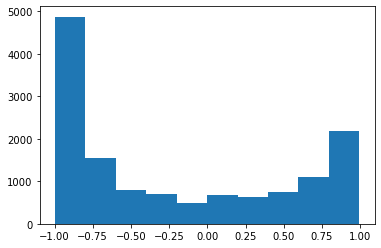

In [19]:
plt.hist(df['compound score'])
plt.show()

In [20]:
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative


In [21]:
df.to_csv('Compiled_News_Articles.csv', index=False)